In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as smp
import os

In [100]:
# Loading all files from directory and merging them together

def Load_all_files_in_directory():
    files = [file for file in os.listdir("./Load")]
    
    all_data = pd.DataFrame()
    
    for file in files:
        df = pd.read_csv("./Load/" + file)
        all_data = pd.concat([all_data, df])

    # Cleaning the data
    all_data = all_data.dropna()
    
    all_data = all_data[all_data["standard_deviation"] != 0]
    all_data = all_data[all_data["per_cent_pixels_pass_qa"] > 75]

    return all_data

all_data = Load_all_files_in_directory()

In [101]:
all_data

,date[YYYYDDD],date,product,band,min,max,sum,range,mean,variance,standard_deviation,tot_pixels,pixels_pass_qa,per_cent_pixels_pass_qa
1,A2000057,2000-02-26,MOD11A2,LST_Day_1km,275.80,285.86,268244.8125,10.06,281.4741,6.0109,2.4517,961,953,99.17
2,A2000065,2000-03-05,MOD11A2,LST_Day_1km,268.24,281.20,211711.2812,12.96,276.0251,6.9949,2.6448,961,767,79.81
5,A2000089,2000-03-29,MOD11A2,LST_Day_1km,278.52,292.04,260471.3438,13.52,286.2322,6.7345,2.5951,961,910,94.69
6,A2000097,2000-04-06,MOD11A2,LST_Day_1km,279.52,295.74,279215.5938,16.22,290.5469,9.6296,3.1032,961,961,100.00
7,A2000105,2000-04-14,MOD11A2,LST_Day_1km,289.32,297.70,283778.4688,8.38,295.2950,1.8885,1.3742,961,961,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,A2022305,2022-11-01,MOD11A2,LST_Night_1km,274.32,279.86,262976.9375,5.54,277.1095,0.7644,0.8743,961,949,98.75
1043,A2022313,2022-11-09,MOD11A2,LST_Night_1km,273.12,280.46,265515.6250,7.34,276.2910,1.5854,1.2591,961,961,100.00
1045,A2022329,2022-11-25,MOD11A2,LST_Night_1km,264.34,275.28,259321.6094,10.94,269.8456,3.4168,1.8485,961,961,100.00
1047,A2022345,2022-12-11,MOD11A2,LST_Night_1km,251.66,265.04,241246.5156,13.38,259.1262,4.4508,2.1097,961,931,96.88


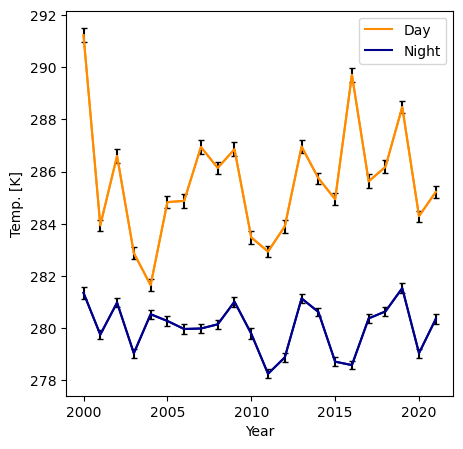

In [102]:
def plot_mean_temp_for_years_day_and_night(all_data):

    data = pd.DataFrame()
    data = all_data
    
    
    #Add years columns
    data["year"] = data["date"].str[0:4]
    data["year"] = pd.to_numeric(data["year"])
    
    #x axis values to plot
    years = range(data.iloc[0,14], data.iloc[-1,14], 1)
    
    data["DorN"] = data["band"].str[4:7]
    DorN = ["Day", "Nig"]
    Dorn = ["Day", "Night"]

    # List for plots
    w_arr = []
    mean_x_arr = [] 
    years_arr = []
    
    for i in range(np.size(DorN)):
        dataA = pd.DataFrame()
        dataA = data.loc[data["DorN"] == DorN[i]]
        
        #Mean by year
        w = np.zeros(np.size(years))
        mean_x = np.zeros(np.size(years))
        
        for j in range(np.size(years)):
            
            dataB = pd.DataFrame()
            dataB = dataA.loc[dataA["year"] == years[j]]
        
            wi = np.zeros(len(dataB))
            wi[0:-1] = 1/pow(dataB.iloc[0:-1, 10],2) 
        
            wx = np.zeros(len(dataB))
            wx[0:-1] = dataB.iloc[0:-1,8]*wi[0:-1]
                    
            mean_x[j] = wx.sum()/wi.sum()
            w[j] = 1/np.sqrt(wi.sum())
    
        w_arr.append(w)
        mean_x_arr.append(mean_x)
        years_arr.append(years)
    
    #Plots
    plt.figure(figsize=(5, 5))
    plt.ylabel("Temp. [K]")
    plt.xlabel("Year")
    
    plt.errorbar(years_arr[0], mean_x_arr[0], yerr=w_arr[0], color='darkorange', ecolor='k', capsize=2)
    plt.plot(years_arr[0], mean_x_arr[0], color='darkorange', label="Day")
    
    plt.errorbar(years_arr[1], mean_x_arr[1], yerr=w_arr[1], color='darkblue', ecolor='k', capsize=2)
    plt.plot(years_arr[1], mean_x_arr[1], color='darkblue', label="Night")
    
    plt.legend(loc="best")

plot_mean_temp_for_years_day_and_night(all_data)

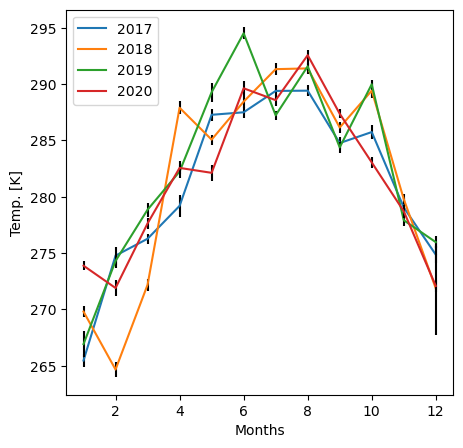

In [103]:
def choose_years_to_plot_mean_temp(all_data, rok=[2018, 2019]):
    '''
    Takes years to plot changes in temp. in months in given year.
    '''
    data = pd.DataFrame()
    data = all_data
    
    data["year"] = all_data["date"].str[0:4]
    data["year"] = pd.to_numeric(data["year"])
    
    
    data["month"] = all_data["date"].str[5:7]
    data["month"] = pd.to_numeric(data["month"])

    plt.figure(figsize=(5, 5))
    plt.ylabel("Temp. [K]")
    plt.xlabel("Months")
    
    for i in range(np.size(rok)):

        dataA = pd.DataFrame()
        dataA = data.loc[data["year"] == rok[i]]
    
        months = range(1, 13, 1)
        
        w = np.zeros(np.size(months))
        mean_x = np.zeros(np.size(months))  
        
        for j in range(np.size(months)):
            
            dataB = pd.DataFrame()
            dataB = dataA.loc[dataA["month"] == months[j]]
        
            wi = np.zeros(len(dataB))
            wi[0:-1] = 1/pow(dataB.iloc[0:-1, 10],2) 
    
            wx = np.zeros(len(dataB))
            wx[0:-1] = dataB.iloc[0:-1,8]*wi[0:-1]
            
            mean_x[j] = wx.sum()/wi.sum()
            w[j] = 1/np.sqrt(wi.sum())
    
        #Plots
        plt.errorbar(months, mean_x, yerr=w, ls="None", color="k")
        plt.plot(months, mean_x, label=rok[i])
        
    plt.legend(loc="best")

choose_years_to_plot_mean_temp(all_data, [2017, 2018, 2019, 2020])

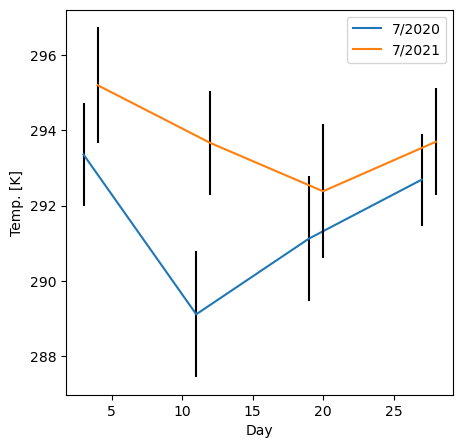

In [104]:
def choose_years_and_months_to_plot_mean_temp(all_data, rok = [2019, 2021], miesiac = [5]):
    '''
    Takes years and months to plot changes in temp. in days in given year and month.
    '''
    data = pd.DataFrame()
    data = all_data
    
    data["year"] = all_data["date"].str[0:4]
    data["year"] = pd.to_numeric(data["year"])
    
    
    data["month"] = all_data["date"].str[5:7]
    data["month"] = pd.to_numeric(data["month"])
    
    
    data["day"] = all_data["date"].str[8:10]
    data["day"] = pd.to_numeric(data["day"])
    
    
    plt.figure(figsize=(5, 5))
    plt.ylabel("Temp. [K]")
    plt.xlabel("Day")
        
    for j in range(np.size(rok)):
        for i in range(np.size(miesiac)):
        
            dataD = pd.DataFrame()
            dataD = data.loc[(data["year"] == rok[j]) & (data["month"] == miesiac[i])]
        
            days = np.zeros(len(dataD))
            for x in range(len(dataD)):
                days[x] = dataD.iloc[x,-1]
            
            days.sort()
            final_day = []
            for num in days:
                if num not in final_day:
                    final_day.append(num)
             
            dataD = dataD.groupby("day")[["mean", "standard_deviation"]].mean()
        
            plt.errorbar(final_day, dataD["mean"], yerr=dataD["standard_deviation"], ls="None", color="k")
            plt.plot(final_day, dataD["mean"], label=f"{miesiac[i]}/{rok[j]}")
    
    plt.legend(loc="best")

choose_years_and_months_to_plot_mean_temp(all_data, [2020, 2021], [7])